In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
#KNN class
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
    
    def _predict(self, x):
        # Calculate the Euclidean distances between the input x and all training examples
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Gather the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common label 
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [3]:
# Load the digits dataset
digits = datasets.load_digits()

# Create a DataFrame
df = pd.DataFrame(data=digits.data,)

# add the target variable
df['target'] = digits.target

df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
#EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [7]:
#Showing the categories of numbers

In [8]:
df['target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
#display the numbers

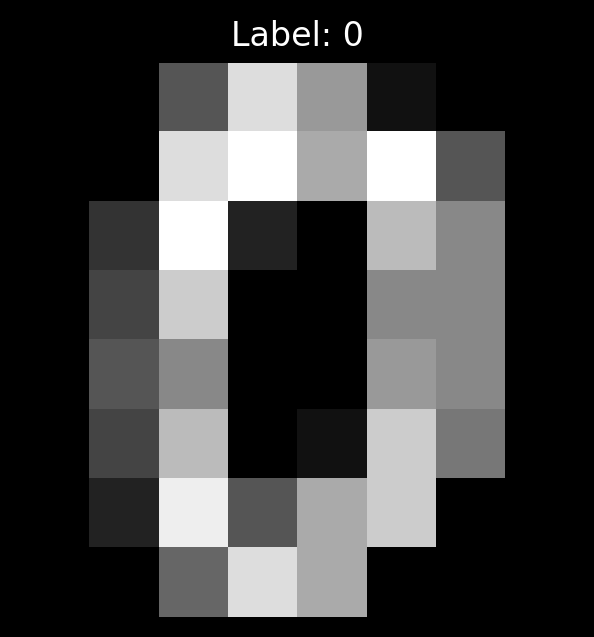

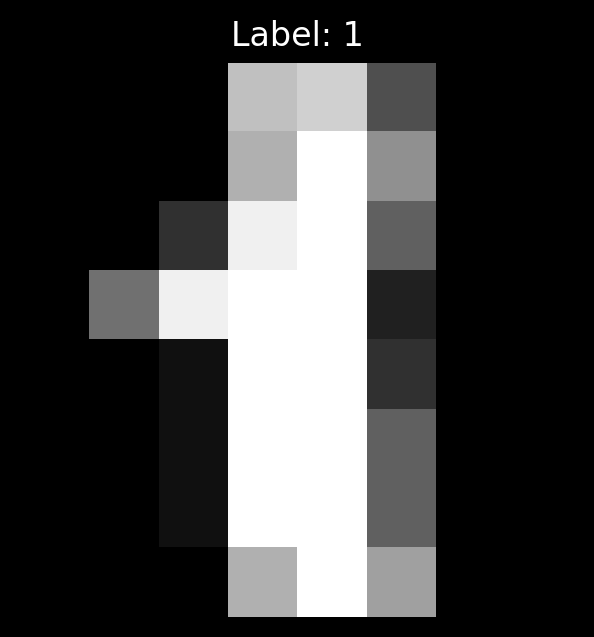

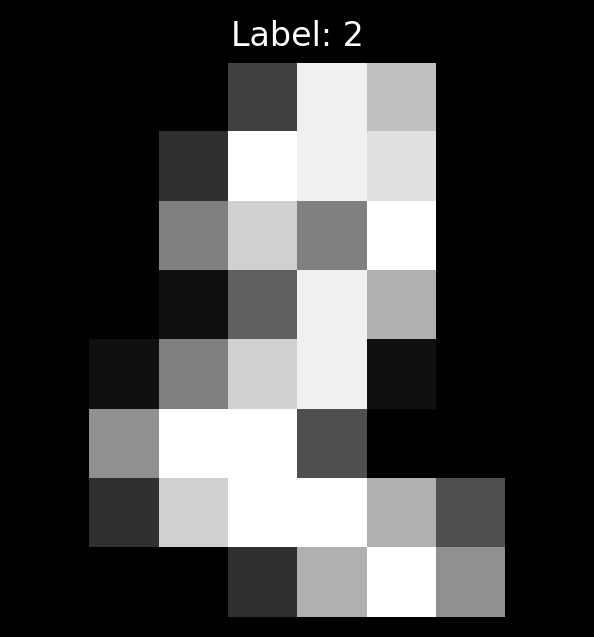

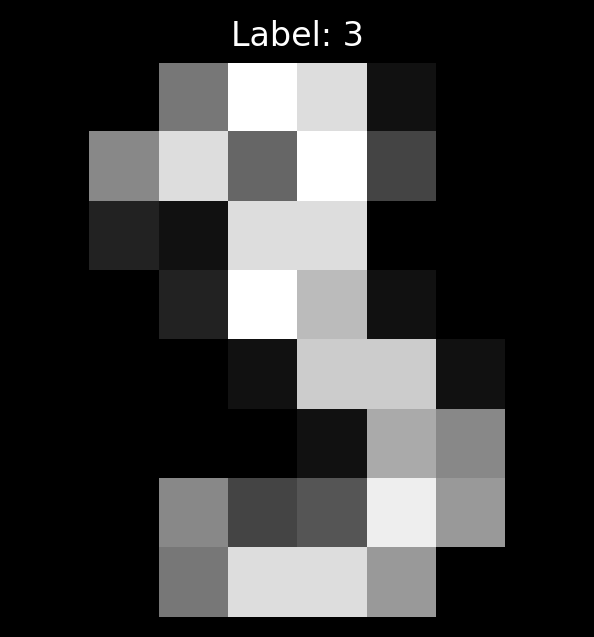

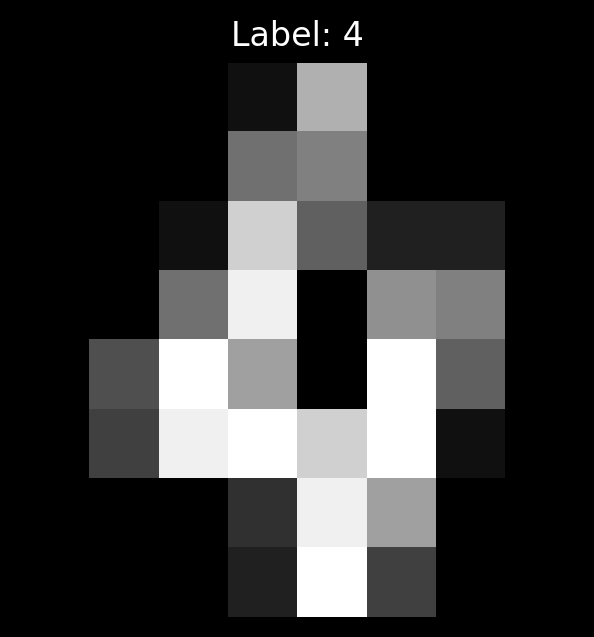

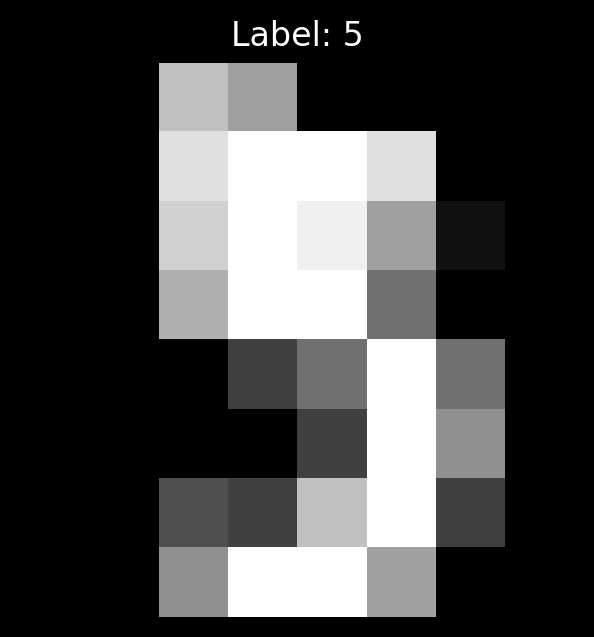

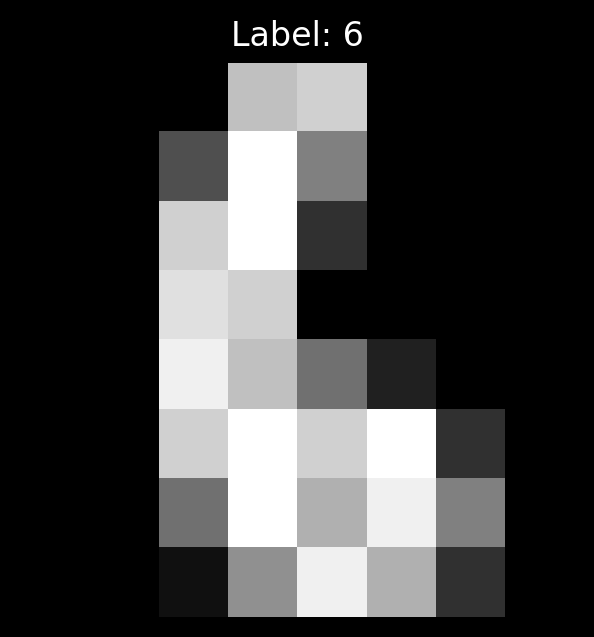

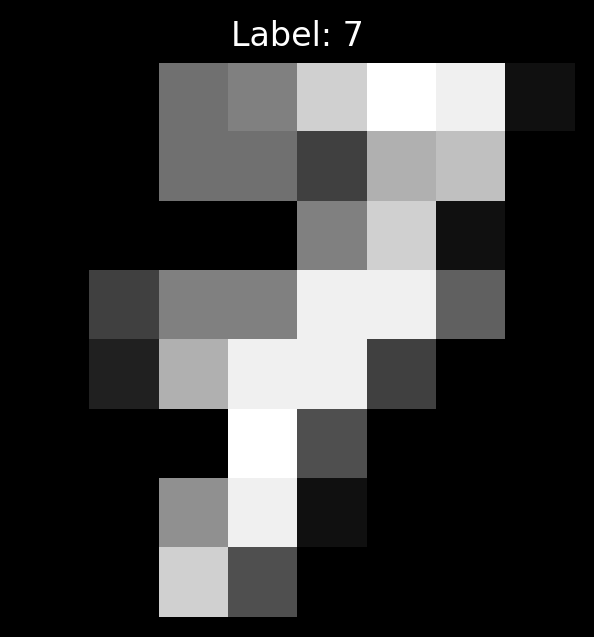

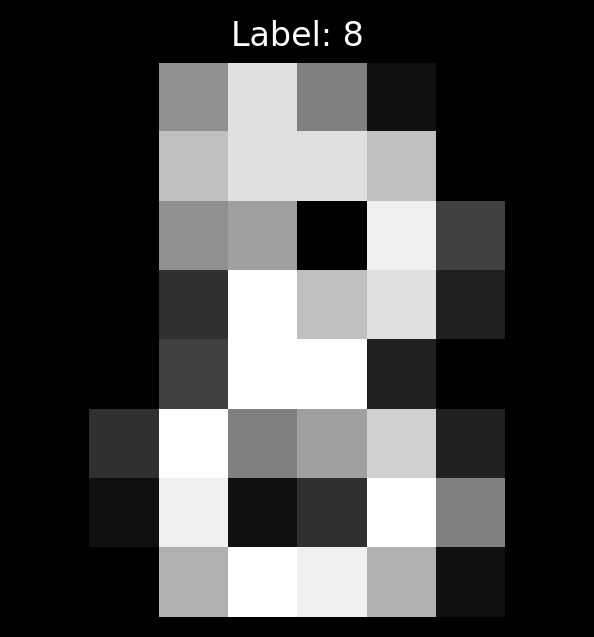

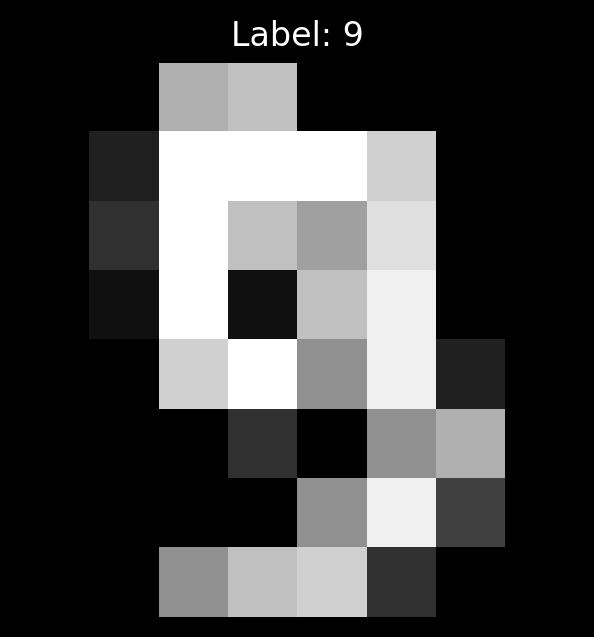

In [10]:
def show_digit(index):
    digit_pixels = np.reshape(df.iloc[index, :-1].values, (8, 8))
    plt.imshow(digit_pixels, cmap='gray')
    plt.title(f"Label: {df['target'][index]}")
    plt.axis('off')  # Hide axes
    plt.show()

# Display the first 10 digits
for i in range(10):
    show_digit(i)

In [11]:
#trading and testing split

In [12]:
X,y = df.drop('target',axis=1),df['target']
X = np.array(X)
y = np.array(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [14]:
#KNN manually

In [15]:
KNN = KNN(k=4)

In [16]:
KNN.fit(X_train,y_train)

In [17]:
predictions = KNN.predict(X_test)
predictions = pd.DataFrame(predictions,columns=['predictions'])
predictions['Actual'] = y_test
predictions

,predictions,Actual
0,4,4
1,6,6
2,5,5
3,8,8
4,5,5
...,...,...
355,2,2
356,6,6
357,8,8
358,6,6


In [18]:
report = classification_report(y_test,predictions['predictions'])
print('Classification Report for KNN manually:')
print(report)

Classification Report for KNN manually:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.99        38
           3       0.94      1.00      0.97        29
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        44
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        28
           8       0.97      0.97      0.97        38
           9       1.00      0.95      0.98        42

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [19]:
#KNN by scikit-learn

In [20]:
KNN = KNeighborsClassifier()

In [21]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
predictions['by scikit learn'] = KNN.predict(X_test)
predictions

,predictions,Actual,by scikit learn
0,4,4,4
1,6,6,6
2,5,5,5
3,8,8,8
4,5,5,5
...,...,...,...
355,2,2,2
356,6,6,6
357,8,8,8
358,6,6,6


In [23]:
report = classification_report(y_test,predictions['by scikit learn'])
print('Classification Report :')
print(report)

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      1.00      0.98        40
           2       1.00      0.97      0.99        38
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.99        40
           5       0.98      1.00      0.99        44
           6       1.00      1.00      1.00        31
           7       0.97      1.00      0.98        28
           8       0.97      0.95      0.96        38
           9       1.00      0.93      0.96        42

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

